# Import Library

In [1]:
from google.colab import drive
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# read dataset function
def read_data_csv(path):
  """
  Read dataset from path

  Parameters
  ----------
  path : str
    Path to dataset

  Returns
  -------
  df : pandas.DataFrame
    Dataset
  """
  # Read data
  df = pd.read_csv(path)

  # Shape of Data
  print("Data Shape:", df.shape)

  return df

In [4]:
df_raw = read_data_csv("/content/drive/MyDrive/Proyek/Anomaly Detection/Data/Credit Card Transaction.csv")
df_raw.head()

Data Shape: (50000, 9)


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


# PreProcessing

In [6]:
df_raw.duplicated().sum()

0

In [7]:
df_raw.isna().sum()

,0
Customer ID,0
Name,0
Surname,0
Gender,5047
Birthdate,0
Transaction Amount,0
Date,0
Merchant Name,0
Category,0


in the Gender Column, there are 5047 null values. So, we're going to handle it by defining it as "Unknown."

In [8]:
df_raw["Gender"].fillna("Unknown", inplace=True)
df_raw.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,Unknown,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


# Exploratory Data Analysis

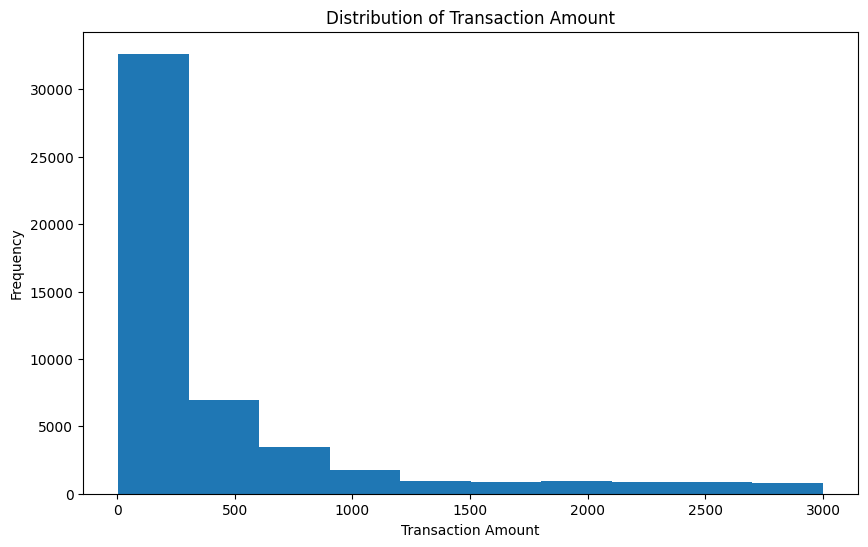

In [9]:
# Visualize Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
plt.hist(df_raw['Transaction Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


The histogram above shows a distribution that is highly skewed to the right, where the majority of transactions fall within a low amount range. Most transactions have very small values, likely below 500.

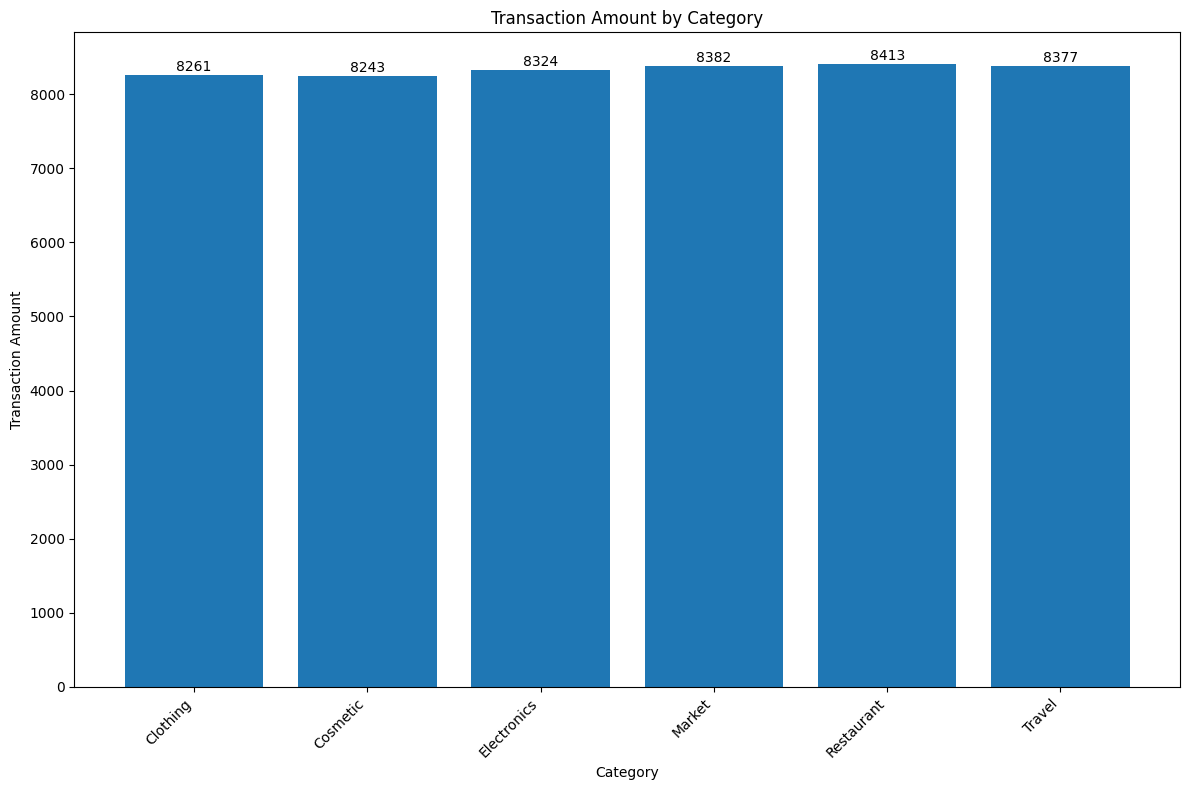

In [31]:
# Group the data by category and calculate the transaction amount for each category
category_transactions = df_raw.groupby('Category')['Transaction Amount'].count()

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(category_transactions.index, category_transactions.values)

# Add data labels inside the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 200, round(yval, 2), ha='center', va='top', color='black')

plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The category with the highest transaction amount is "Restaurant" (8413), while the category with the lowest is "Cosmetic" (8243). However, the difference is minimal, indicating that no single category dominates the transaction amounts significantly.

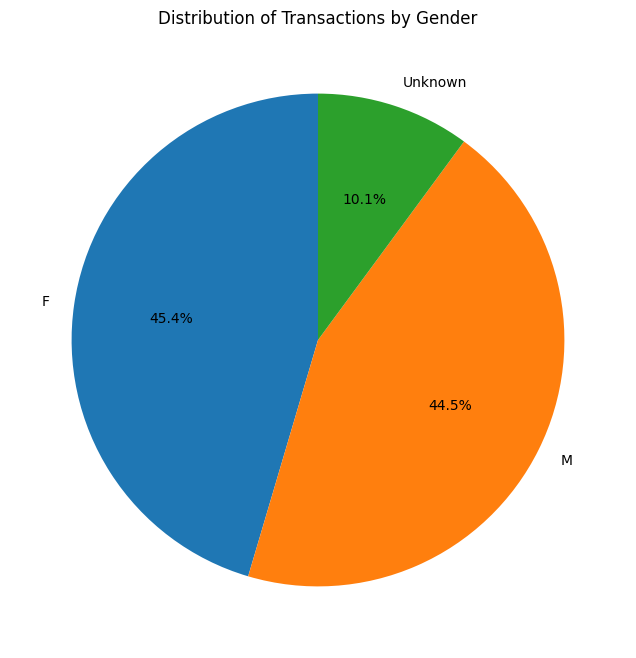

In [11]:
# Group data by gender and count transactions
gender_counts = df_raw['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transactions by Gender')
plt.show()


The chart shows a fairly balanced distribution between Female (45.4%) and Male (44.5%) transactions, indicating that both genders are almost equally represented in the transaction data. A notable 10.1% of the transactions fall under the "Unknown" category. This could suggest missing or unclassified data regarding gender in the dataset.

# Feature Engineering

In [12]:
# Define Column that will be choosen
col = ["Customer ID", "Date", "Transaction Amount"]

# Copy dataframe
df = df_raw[col].copy()
df.head()

,Customer ID,Date,Transaction Amount
0,752858,03-04-2023,35.47
1,26381,17-07-2023,2552.72
2,305449,20-09-2023,115.97
3,988259,11-01-2023,11.31
4,764762,13-06-2023,62.21


In [13]:
# Change to datatime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Feature Selection
features = df.groupby("Date")["Transaction Amount"].sum().reset_index()
features.head()


,Date,Transaction Amount
0,2023-01-01,65531.45
1,2023-01-02,78895.54
2,2023-01-03,60747.61
3,2023-01-04,93617.86
4,2023-01-05,87047.84


In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                287 non-null    datetime64[ns]
 1   Transaction Amount  287 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


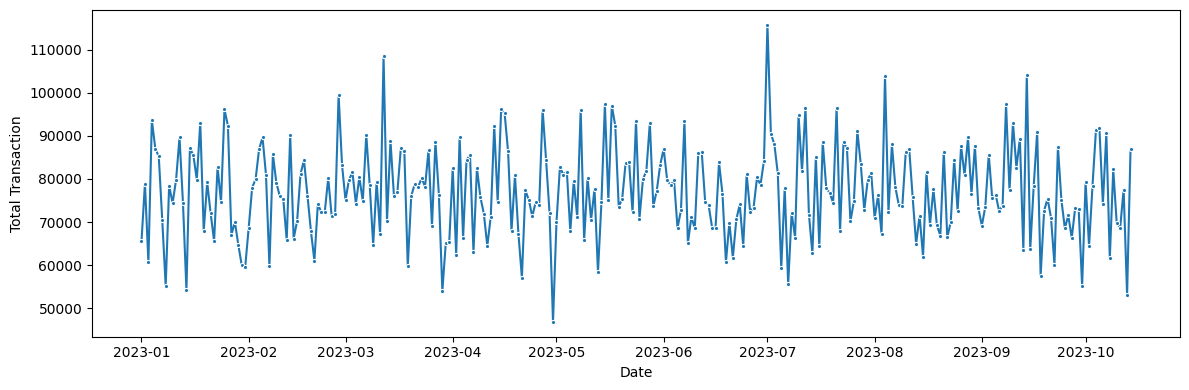

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x='Date', y='Transaction Amount', marker='.', data=features, ax=ax)

# Atur label sumbu x dan y
ax.set_xlabel('Date')
ax.set_ylabel('Total Transaction')

plt.tight_layout()
plt.show()

*   January to February 2023: The start of the year shows high activity with several peaks and troughs, indicating strong but inconsistent transaction volumes.
*   March to May 2023: There is a slight decrease in volatility, but the transaction volumes continue to fluctuate, showing no clear trend.
*   June to August 2023: A notable spike in transaction volumes occurs around July 2023, but followed by a sharp drop, and then the volumes stabilize with continued fluctuations.
*   September to October 2023: The transaction volumes remain volatile with no clear upward or downward trend, suggesting continued inconsistency in daily transactions.

# Detection Anomaly

In [16]:
def calculate_iqr_threshold(data, column):
  """
  Calculate the IQR threshold for outlier detection.

  Parameters
  ----------
  data : pandas.DataFrame
    Input DataFrame.
  column : str
    Column name to calculate IQR threshold.

  Returns
  -------
  lower_threshold : float
    Lower threshold for outlier detection.
  upper_threshold : float
    Upper threshold for outlier detection.
  """
  # Calculate Q1 and Q3
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Calculate Threshold
  lower_threshold = Q1 - 1.5 * IQR
  upper_threshold = Q3 + 1.5 * IQR

  return Q1, Q3, IQR, lower_threshold, upper_threshold

In [17]:
q1, q3, iqr, lower_threshold, upper_threshold = calculate_iqr_threshold(features, 'Transaction Amount')

# Print Output
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Threshold:", lower_threshold)
print("Upper Threshold:", upper_threshold)

Q1: 70129.805
Q3: 84257.985
IQR: 14128.180000000008
Lower Threshold: 48937.53499999998
Upper Threshold: 105450.255


In [18]:
# Create a dot label outside the threshold
greater = features['Transaction Amount'] > upper_threshold
lesser = features['Transaction Amount'] < lower_threshold
features['Anomaly'] = greater | lesser

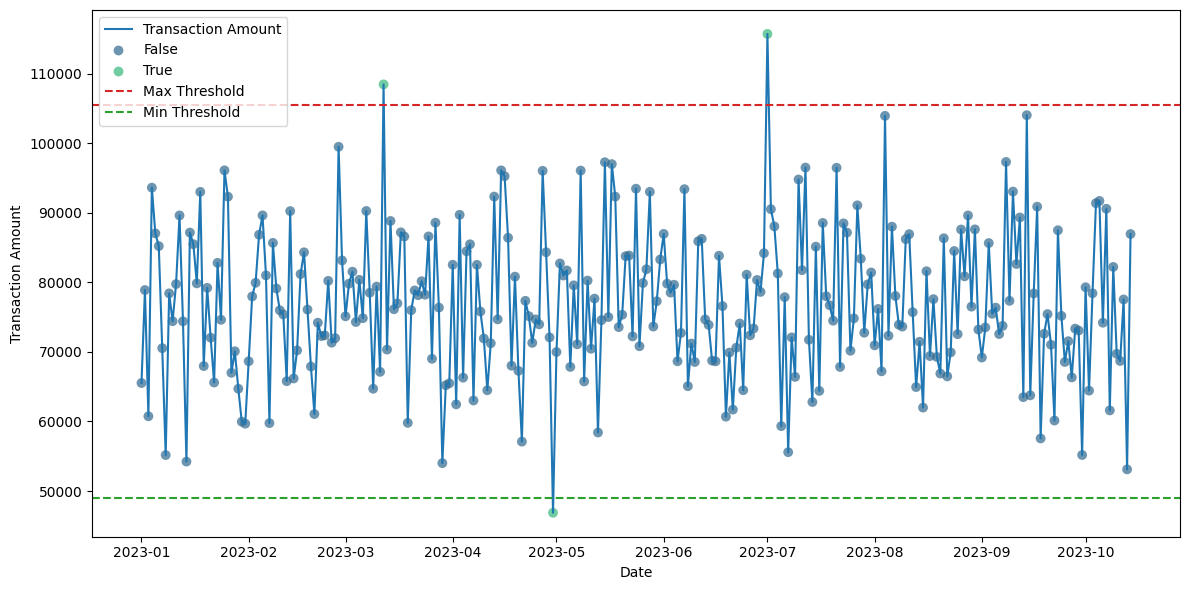

In [19]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot of sales over time
sns.lineplot(x='Date', y='Transaction Amount', data=features, ax=ax, label='Transaction Amount')

# Scatter plot for anomaly status
sns.scatterplot(x='Date', y='Transaction Amount', hue='Anomaly',
                data=features, palette='viridis', marker='o', s=50, alpha=0.7,
                edgecolor='none', ax=ax, legend='full')

# Threshold lines
ax.axhline(upper_threshold, color='tab:red', linestyle='--', label='Max Threshold')
ax.axhline(lower_threshold, color='tab:green', linestyle='--', label='Min Threshold')

# Labels and legends
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Amount')
ax.legend(loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

The graph shows an anomaly on a given date. It is marked with a green colored dot that passes the threshold.

In [20]:
# Proportion Anomaly
features['Anomaly'].value_counts(normalize=True)

,proportion
Anomaly,
False,0.989547
True,0.010453


We obtain anomaly 1,04%

In [21]:
# We can check data that have anomaly
features[features['Anomaly'] == True]

,Date,Transaction Amount,Anomaly
70,2023-03-12,108464.15,True
119,2023-04-30,46868.41,True
181,2023-07-01,115721.05,True


**Recommendation**

Based on the analysis, we can conduct a deeper investigation into each anomaly point to determine the specific causes of the spikes or drops.

If the anomalies are caused by errors or undesirable activities, we should consider taking corrective actions to address those issues.

On the other hand, if the anomalies are the result of desired activities (such as successful promotions), this analysis can be used as a guide to replicate those strategies in the future.
